In [1]:
pip install pyAudioAnalysis

     ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/41.3 MB 4.8 MB/s eta 0:00:09
      --------------------------------------- 0.7/41.3 MB 11.2 MB/s eta 0:00:04
     - -------------------------------------- 1.3/41.3 MB 12.1 MB/s eta 0:00:04
     - -------------------------------------- 2.0/41.3 MB 12.7 MB/s eta 0:00:04
     -- ------------------------------------- 2.6/41.3 MB 12.8 MB/s eta 0:00:04
     --- ------------------------------------ 3.3/41.3 MB 13.0 MB/s eta 0:00:03
     --- ------------------------------------ 3.9/41.3 MB 13.1 MB/s eta 0:00:03
     ---- ----------------------------------- 4.5/41.3 MB 13.0 MB/s eta 0:00:03
     ---- ----------------------------------- 5.2/41.3 MB 13.2 MB/s eta 0:00:03
     ----- ---------------------------------- 5.8/41.3 MB 13.2 MB/s eta 0:00:03
     ------ --------------------------------- 6.4/41.3 MB 13.2 MB/s eta 0:00:03
     ------ --------------------------------- 7.1


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install eyed3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'energy')

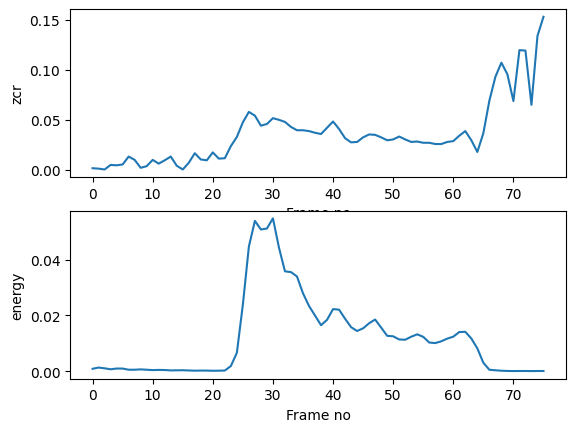

In [23]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

# Load the audio file
[Fs, x] = audioBasicIO.read_audio_file('../data/raw/test.wav')

# Convert stereo to mono if necessary
if x.ndim > 1:  # Check if the audio has more than one channel (i.e., it's stereo)
    x = audioBasicIO.stereo_to_mono(x)

# Extract short-term features
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)

# Plot the extracted features
plt.subplot(2, 1, 1)
plt.plot(F[0, :])
plt.xlabel('Frame no')
plt.ylabel(f_names[0])

plt.subplot(2, 1, 2)
plt.plot(F[1, :])
plt.xlabel('Frame no')
plt.ylabel(f_names[1])

In [25]:
import pandas as pd

# Convert the extracted features to a pandas DataFrame
df_features = pd.DataFrame(F.T, columns=f_names)  # Transpose F to align with f_names

# Display the DataFrame
df_features.head()

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std
0,0.001667,0.000857,2.537233,0.092762,0.206285,0.005644,0.000000,0.000833,-32.883753,2.514043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001251,0.001302,3.063686,0.136789,0.232823,0.033225,0.079388,0.002500,-29.991797,2.254405,...,0.000468,0.001668,0.000805,0.171148,0.000104,0.000171,0.003559,0.005421,0.000121,0.046533
2,0.000417,0.001031,3.046052,0.117108,0.219964,0.021823,0.007054,0.001667,-31.093810,2.172911,...,0.000187,-0.000897,-0.000467,-0.048480,-0.000056,-0.000179,-0.002767,-0.000323,-0.000022,-0.013257
3,0.005002,0.000683,2.867765,0.100421,0.196211,0.021805,0.008654,0.000833,-31.218811,2.106553,...,-0.000389,-0.000601,0.000400,-0.086459,0.000119,0.000616,0.002285,-0.004636,-0.000020,-0.023570
4,0.004585,0.000947,3.001871,0.112714,0.205958,0.035516,0.013197,0.002500,-30.370933,2.265574,...,0.000814,0.001066,-0.000051,0.107362,0.000141,0.000068,-0.003843,0.002796,0.000065,0.029444
